In [1]:
!python preprocess_dataset.py

Figure(640x480)


Traceback (most recent call last):
  File "E:\testBTL\preprocess_dataset.py", line 70, in <module>
    print("D\u1eef li\u1ec7u \u0111ã ti\u1ec1n x\u1eed lý xong:")
  File "C:\Users\Admin\miniconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u1eef' in position 1: character maps to <undefined>


In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from preprocess_dataset import load_dataset
from sklearn.model_selection import train_test_split

# Load dữ liệu đã tiền xử lý
X, y, label_names = load_dataset("./data")
num_classes = len(label_names)

# One-hot encode nhãn
y_cat = to_categorical(y, num_classes)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=42)

In [3]:
# Định nghĩa mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


E:\testBTL\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 137s 919ms/step - accuracy: 0.3856 - loss: 2.2823 - val_accuracy: 0.9862 - val_loss: 0.0444
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 128s 879ms/step - accuracy: 0.9671 - loss: 0.1179 - val_accuracy: 0.9922 - val_loss: 0.0236
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 128s 882ms/step - accuracy: 0.9840 - loss: 0.0529 - val_accuracy: 0.9957 - val_loss: 0.0147
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 127s 878ms/step - accuracy: 0.9895 - loss: 0.0337 - val_accuracy: 0.9948 - val_loss: 0.0094
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 127s 879ms/step - accuracy: 0.9861 - loss: 0.0442 - val_accuracy: 0.9974 - val_loss: 0.0063
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 127s 875ms/step - accuracy: 0.9892 - loss: 0.0412 - val_accuracy: 0.9991 - val_loss: 0.0055
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 126s 871ms/step - accuracy: 0.9883 - loss: 0.0349 - val_accuracy: 0.9974 - val_loss: 0.0063
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 126s 870ms/step - accuracy: 0.9901 -

In [5]:
# Lưu mô hình
model.save("hand_sign_cnn_model.h5")
print("Đã lưu mô hình thành công.")

Đã lưu mô hình thành công.


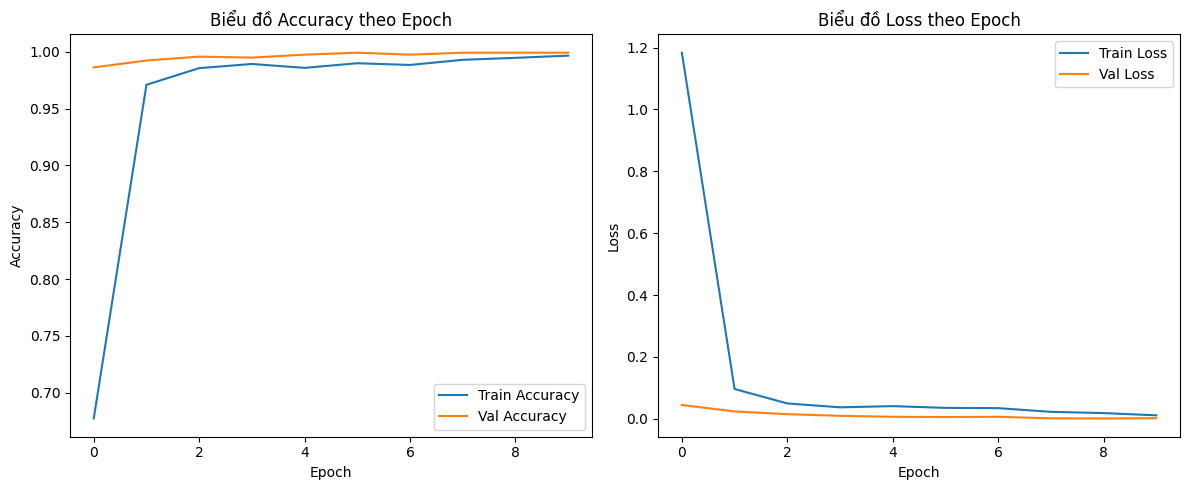

In [6]:
# Vẽ biểu đồ Accuracy và Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Biểu đồ Accuracy theo Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Biểu đồ Loss theo Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
#plt.savefig("training_metrics.png")  # Lưu ảnh biểu đồ nếu cần
plt.show()

In [3]:
!python realtime_inference.py

RuntimeError: CPU dispatcher tracer already initlized
RuntimeError: CPU dispatcher tracer already initlized
RuntimeError: CPU dispatcher tracer already initlized
ImportError: _multiarray_umath failed to import
RuntimeError: CPU dispatcher tracer already initlized
RuntimeError: CPU dispatcher tracer already initlized
RuntimeError: CPU dispatcher tracer already initlized
RuntimeError: CPU dispatcher tracer already initlized
Traceback (most recent call last):
  File "E:\ASLDetection\realtime_inference.py", line 8, in <module>
    model = tf.keras.models.load_model("hand_sign_cnn_model.h5")
  File "C:\Users\Admin\miniconda3\lib\site-packages\keras\src\saving\saving_api.py", line 238, in load_model
    return legacy_sm_saving_lib.load_model(
  File "C:\Users\Admin\miniconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\Admin\miniconda3\lib\site-packages\keras\src\saving\legacy\save.py", li